In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported!")

✓ Libraries imported!


In [2]:
df = pd.read_csv('data/raw_data.csv')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(df.head())

Dataset loaded: 7043 rows, 21 columns
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingT

In [3]:
print("\nMissing Values:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing_Count'] > 0])



Missing Values:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []


In [5]:
# TotalCharges should be numeric but has some issues
print("\nChecking TotalCharges column:")
print(df['TotalCharges'].dtype)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values after conversion
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")


Checking TotalCharges column:
object
Missing values in TotalCharges: 11


In [6]:
# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print(f"✓ Missing values filled")
print(f"Remaining missing values: {df.isnull().sum().sum()}")


✓ Missing values filled
Remaining missing values: 0


In [7]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"✓ Removed {duplicates} duplicate rows")



Duplicate rows: 0


In [8]:
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("✓ Dropped customerID column")


✓ Dropped customerID column


In [9]:
print("\nData Types:")
print(df.dtypes)


Data Types:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [10]:
# Cell 9: Identify Categorical and Numerical Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")


Categorical columns (16): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical columns (4): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [11]:
print("\nChecking for outliers using IQR method:")

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"{col}: {outliers} outliers")


Checking for outliers using IQR method:
SeniorCitizen: 1142 outliers
tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers


✓ Outlier visualization saved


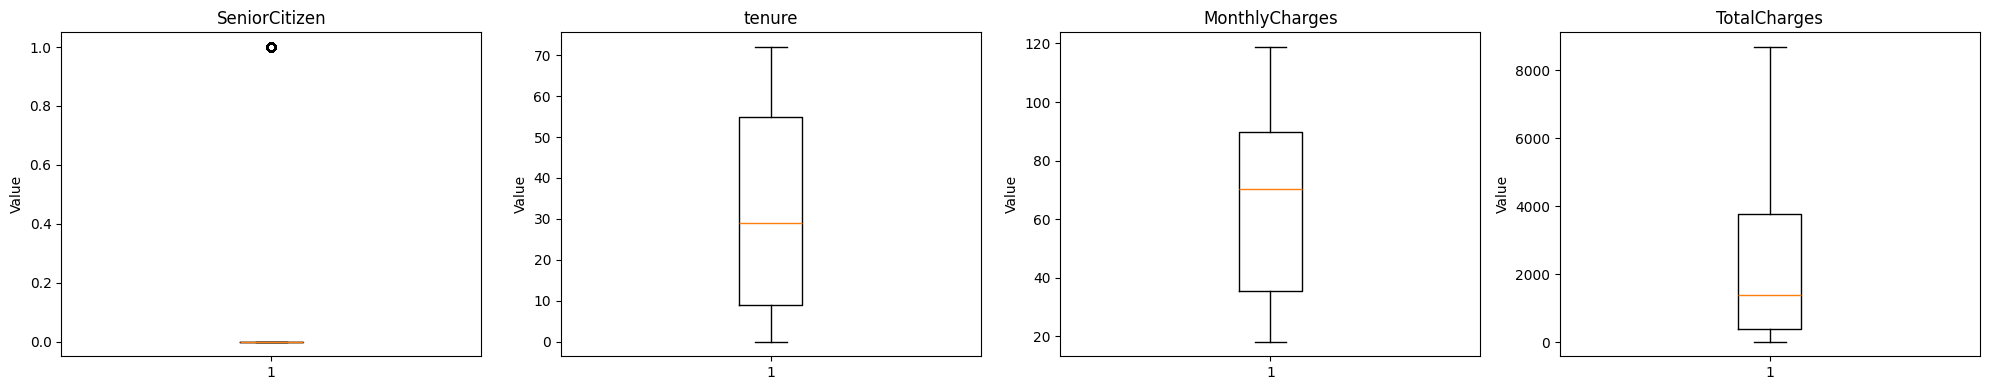

In [13]:
ig, axes = plt.subplots(1, len(numerical_cols), figsize=(5 * len(numerical_cols), 4))
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.savefig('data/outliers_boxplot.png')
print("✓ Outlier visualization saved")
plt.show()

In [14]:
# Cell 12: Handle Outliers (optional - usually we keep them in churn prediction)
# For this case, we'll keep outliers as high charges might indicate churn
print("\n✓ Keeping outliers (they are meaningful for churn prediction)")


✓ Keeping outliers (they are meaningful for churn prediction)


In [15]:
# Cell 13: Data Consistency Check
print("\nData Consistency Checks:")

# Check if tenure is 0 but TotalCharges is high
inconsistent = df[(df['tenure'] == 0) & (df['TotalCharges'] > 0)]
print(f"Rows with tenure=0 but TotalCharges>0: {len(inconsistent)}")

if len(inconsistent) > 0:
    # Fix: Set TotalCharges to 0 for tenure=0
    df.loc[df['tenure'] == 0, 'TotalCharges'] = 0
    print("✓ Fixed inconsistencies")


Data Consistency Checks:
Rows with tenure=0 but TotalCharges>0: 11
✓ Fixed inconsistencies


In [16]:
# Cell 14: Check Final Dataset
print("\nCleaned Dataset Summary:")
print(f"Shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")



Cleaned Dataset Summary:
Shape: (7043, 20)
Missing values: 0
Duplicates: 22


In [17]:
# Cell 15: Save Cleaned Data
df.to_csv('data/cleaned_data.csv', index=False)
print("\n✓ Cleaned data saved to 'data/cleaned_data.csv'")


✓ Cleaned data saved to 'data/cleaned_data.csv'


In [18]:
# Cell 16: Display Sample
print("\nSample of cleaned data:")
print(df.head(10))


Sample of cleaned data:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   
5  Female              0      No         No       8          Yes   
6    Male              0      No        Yes      22          Yes   
7  Female              0      No         No      10           No   
8  Female              0     Yes         No      28          Yes   
9    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No      